# Readme: MSBD-5002 Assignment 2

## Task Description
The dataset come from 1994 Census database. Prediction task is to determine whether a person makes over 50K a year.

## Data Exploration

### Import Necessary Modules & Files

In [1]:
# import modules
import numpy as np
import pandas as pd
from sklearn import metrics

# import visualization file
import matplotlib.pyplot as plt
import visuals as vs
%matplotlib inline

# import Training Data & Testing Data
train_features = pd.read_csv("trainFeatures.csv")
train_labels = pd.read_csv("trainLabels.csv", header=None, names=["label"])
test_features = pd.read_csv("testFeatures.csv")


### Explore the Training Data Sets

In [2]:
# display the training sets
print "features shape: {}".format(train_features.shape)
print "features shape: {}".format(train_labels.shape)
display(train_features.head())
display(train_labels.head())

features shape: (34189, 14)
features shape: (34189, 1)


,age,workclass,fnlwgt,education,education-num,Marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,24,Private,258298,Assoc-voc,11,Never-married,Tech-support,Not-in-family,White,Male,0,0,45,United-States
1,28,Private,208249,Some-college,10,Divorced,Tech-support,Not-in-family,White,Male,0,0,24,United-States
2,49,Private,143459,9th,5,Separated,Handlers-cleaners,Own-child,White,Male,0,0,38,United-States
3,24,Private,228772,5th-6th,3,Never-married,Machine-op-inspct,Other-relative,White,Female,0,0,40,Mexico
4,20,State-gov,41103,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,20,United-States


,label
0,0
1,0
2,0
3,0
4,0


In [3]:
# Describe the training features
train_features.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,34189.000000,3.418900e+04,34189.000000,34189.000000,34189.000000,34189.000000
mean,38.646143,1.897921e+05,10.077101,1073.523765,87.645442,40.452836
std,13.679417,1.054070e+05,2.565457,7451.485819,403.366678,12.482635
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178470e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784490e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376240e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
'''
Explore the training labels
'''

# total records
n_records = len(train_labels)

# number of people making over 50k/year
n_greater_50k = len(train_labels[train_labels['label'] == 1])

# number of people making at most 50k/year
n_at_most_50k = len(train_labels[train_labels['label'] == 0])

# calculate the percent of people making over 50k/year
percentage = float(n_greater_50k) / n_records

# 打印结果
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2%}".format(percentage)



Total number of records: 34189
Individuals making more than $50,000: 8168
Individuals making at most $50,000: 26021
Percentage of individuals making more than $50,000: 23.89%


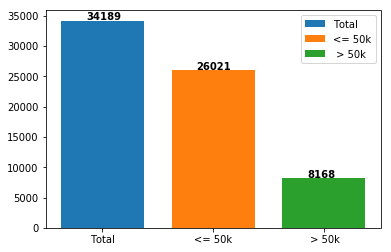

In [5]:
'''
Visualize the result in bar chart
'''
# initialize the data
n_list = [n_records, n_at_most_50k, n_greater_50k]
name_list = ['Total', '<= 50k', ' > 50k']

# set the bars
fig, ax = plt.subplots()
width = 0.75
ax.bar(0, n_list[0], width, label=name_list[0])
ax.bar(1, n_list[1], width, label=name_list[1])
ax.bar(2, n_list[2], width, label=name_list[2])

# set the x-axis ticklabels
ax.set_xticks(range(len(n_list)))
ax.set_xticklabels(name_list, minor=False)

# show the number above the bars
for i, value in enumerate(n_list):
    ax.text(i - .15, value + 100, str(value), color="black", fontweight='bold')
    
ax.legend()
plt.show()


## Data Preparation

Before the training data sets can be used as input for ensemble learning algorithms, they must be cleaned, formatted, and restructured which is known as **data preprocessing**. It can help tremendously with the final outcome and accurate prediction.

### Combine the training datasets and testing datasets

In [6]:
combined_features = pd.concat([train_features, test_features], axis=0)
combined_features.shape

(48842, 14)

### Transforming Skewed Continuous Features

Training datasets usually contain some skewed continuous features which will have negative effects on our prediction. Machine learning algorithms can be very sensitive to such distributions of values or some outliers. Thus, we have to do some data preprocessing or transformation to avoid such kinds of problem. In our training data set, 2 features have this problem: `'capital-gain'` and `'capital-loss'`.


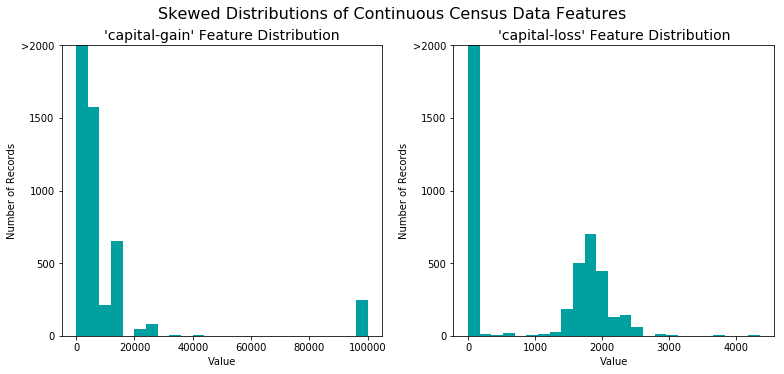

In [7]:
# Visualize the distributions of features "capital-gain" & "capital-loss"
vs.distribution(combined_features)

But how can we solve this kinds of problems? Actually, for highly-skewed features, it is common practice to apply **Logarithmic transformation** on the data so as to eliminate the negative effects of outliers. 

Note: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.


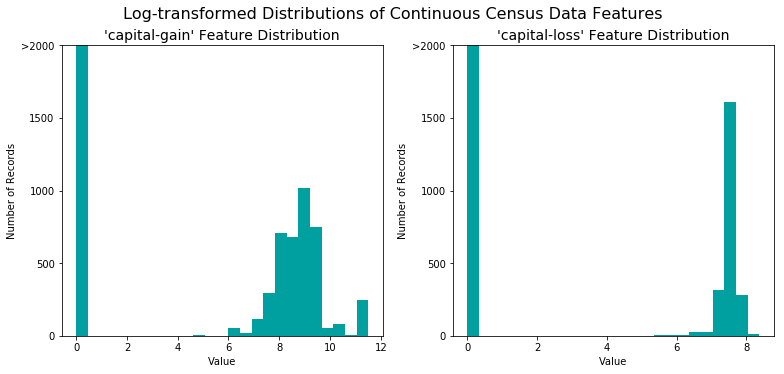

In [8]:
# Apply Logarithmic Transformation on the training features & testing features
skewed = ['capital-gain', 'capital-loss']
features_log = pd.DataFrame(data = combined_features)
features_log[skewed] = combined_features[skewed].apply(lambda x: np.log(x + 1))

# Visualize the distributions of features "capital-gain" & "capital-loss"
vs.distribution(features_log, transformed = True)


### Normalizing Numerical Features

Usually, different features have different values. Some features may have a very large mean value  while the other features have a very small mean. However, we have to ensure that all the numeric features share the same value range so that classifiers or models will treat features equivalently. 


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'fnlwgt']

features_log_minmax = pd.DataFrame(data = features_log)
features_log_minmax[numerical] = scaler.fit_transform(features_log[numerical])

# Display the result
display(features_log_minmax.head(n = 5))


,age,workclass,fnlwgt,education,education-num,Marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.095890,Private,0.166437,Assoc-voc,0.666667,Never-married,Tech-support,Not-in-family,White,Male,0.0,0.0,0.448980,United-States
1,0.150685,Private,0.132577,Some-college,0.600000,Divorced,Tech-support,Not-in-family,White,Male,0.0,0.0,0.234694,United-States
2,0.438356,Private,0.088744,9th,0.266667,Separated,Handlers-cleaners,Own-child,White,Male,0.0,0.0,0.377551,United-States
3,0.095890,Private,0.146462,5th-6th,0.133333,Never-married,Machine-op-inspct,Other-relative,White,Female,0.0,0.0,0.397959,Mexico
4,0.041096,State-gov,0.019496,Some-college,0.600000,Never-married,Other-service,Own-child,White,Female,0.0,0.0,0.193878,United-States


### One-Hot Encoding

Machine learning algorithms will prefer numeric values for prediction so we have to transfer some categorical features into numeric features by using the technique of **One-Hot Encoding**.

In [10]:
# One-Hot Encoding
features_encoded = pd.get_dummies(features_log_minmax)

# Get the features list
encoded_features = list(features_encoded.columns)
# display(encoded_features)
print "Total number of features after one-hot encoding: {}".format(len(encoded_features))

Total number of features after one-hot encoding: 108


### Shuffle & Split Data

In [11]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the preprocessed training datasets & testing datasets
train_features_pre = features_encoded[:train_features.shape[0]]
test_features_pre = features_encoded[train_features.shape[0]:]

# Split the 'features' and 'income' data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(train_features_pre, 
                                                  train_labels,
                                                  test_size = 0.2,
                                                  random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Validation set has {} samples.".format(X_val.shape[0])


Training set has 27351 samples.
Validation set has 6838 samples.


## Model Evaluation & Selection

### Naive Predictor

We have to use a **Naive Predictor** for comparison of our models. In this naive predictor, we mainly consider about the following evaluation metrics:
- Accuracy
- Recall Rate
- Precision Rate
- F0.5-Score (Higher Precision)


In [12]:
# Check the validation data
n_val_greater_50k = len(y_val[y_val['label']==1])
n_val_at_most_50k = len(y_val[y_val['label']==0])
n_val_records = len(y_val)

print "Validaiton set has {} samples".format(n_val_records)
print "{} samples are greater than 50k".format(n_val_greater_50k)
print "{} samples are at most 50k".format(n_val_at_most_50k)

Validaiton set has 6838 samples
1655 samples are greater than 50k
5183 samples are at most 50k


We can then draw a **Confusion Metrix** from the validation data:

|  income    | predict >50k       | predict <=50k  |
| :--------: | :----------:       | :------------: |
| >50k       | n_val_greater_50k  |   0            |
| <=50k      | n_val_at_most_50k  |   0            |

In [13]:
# Calculate the evaluation metrics value of the Naive Predictor
naive_accuracy = round(float(n_val_greater_50k) / n_val_records, 2)
naive_precision = round(float(n_val_greater_50k) / n_val_records, 2)
naive_recall = round(float(n_val_greater_50k) / n_val_greater_50k, 2)
beta = 0.5
naive_fscore = round((1 + beta**2) * (naive_precision * naive_recall) / (beta**2 * naive_precision + naive_recall), 2)


# 打印结果
print "Naive Predictor on validation data: \n \
    Accuracy score: {:.2f} \n \
    Precision: {:.2f} \n \
    Recall: {:.2f} \n \
    F-score: {:.2f}".format(naive_accuracy,
                            naive_precision,
                            naive_recall,
                            naive_fscore)



Naive Predictor on validation data: 
     Accuracy score: 0.24 
     Precision: 0.24 
     Recall: 1.00 
     F-score: 0.28


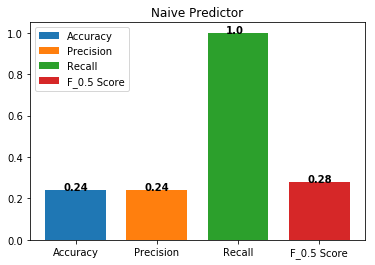

In [14]:
'''
Visualize the result of the Naive Predictor
'''
# initialize the data
naive_list = [naive_accuracy, naive_precision, naive_recall, naive_fscore]
naive_name_list = ['Accuracy', 'Precision', 'Recall', 'F_0.5 Score']

# set the bars
fig, ax = plt.subplots()
width = 0.75
ax.bar(0, naive_list[0], width, label=naive_name_list[0])
ax.bar(1, naive_list[1], width, label=naive_name_list[1])
ax.bar(2, naive_list[2], width, label=naive_name_list[2])
ax.bar(3, naive_list[3], width, label=naive_name_list[3])

# set the x-axis ticklabels
ax.set_xticks(range(len(naive_list)))
ax.set_xticklabels(naive_name_list, minor=False)

# show the number above the bars
for i, value in enumerate(naive_list):
    ax.text(i - .15, value, str(value), color="black", fontweight='bold')
    
ax.legend()
ax.set_title("Naive Predictor")
plt.show()

### Ensemble Learning Model Selection
I choose the following ensemble learning model for prediction:
#### RandomForest
#### Adaboost
#### Gradient Boosted Regression Trees

Before using the ensemble learning models, I will first write a function for training and testing. The function is implemented in the following part:

In [15]:
from sklearn.metrics import fbeta_score, accuracy_score
from time import time

def train_predict(learner, sample_size, X_train, y_train, X_val, y_val): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_val: features validation set
       - y_val: income validation set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get the start time
    learner = learner.fit(X_train.iloc[: sample_size], y_train.iloc[: sample_size].values.ravel())
    end = time()   # Get the end time
    
    # Calculate the training time
    results['train_time'] = end - start
    
    # Get the predictions on the validation set(X_val)
    # Then, calculate the predictions of the first 1000 training samples
    start = time()
    predictions_val = learner.predict(X_val)
    predictions_train = learner.predict(X_train.iloc[:1000])
    end = time()
    
    # Calculate the prediction time
    results['pred_time'] = end - start
            
    # Calculate the accuracy & F-score of the prediction
    # on the first 1000 training samples
    results['acc_train'] = accuracy_score(y_train.iloc[:1000], predictions_train)
    results['f_train'] = fbeta_score(y_train.iloc[:1000], predictions_train, beta=0.5)
        
    # Calculate the accuracy & F-score of the prediction on the validation set
    results['acc_val'] = accuracy_score(y_val, predictions_val)
    results['f_val'] = fbeta_score(y_val, predictions_val, beta=0.5)
       
    # Output the result
#     print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the result
    return results


Then, I will make a comparison on the three ensemble learning models.

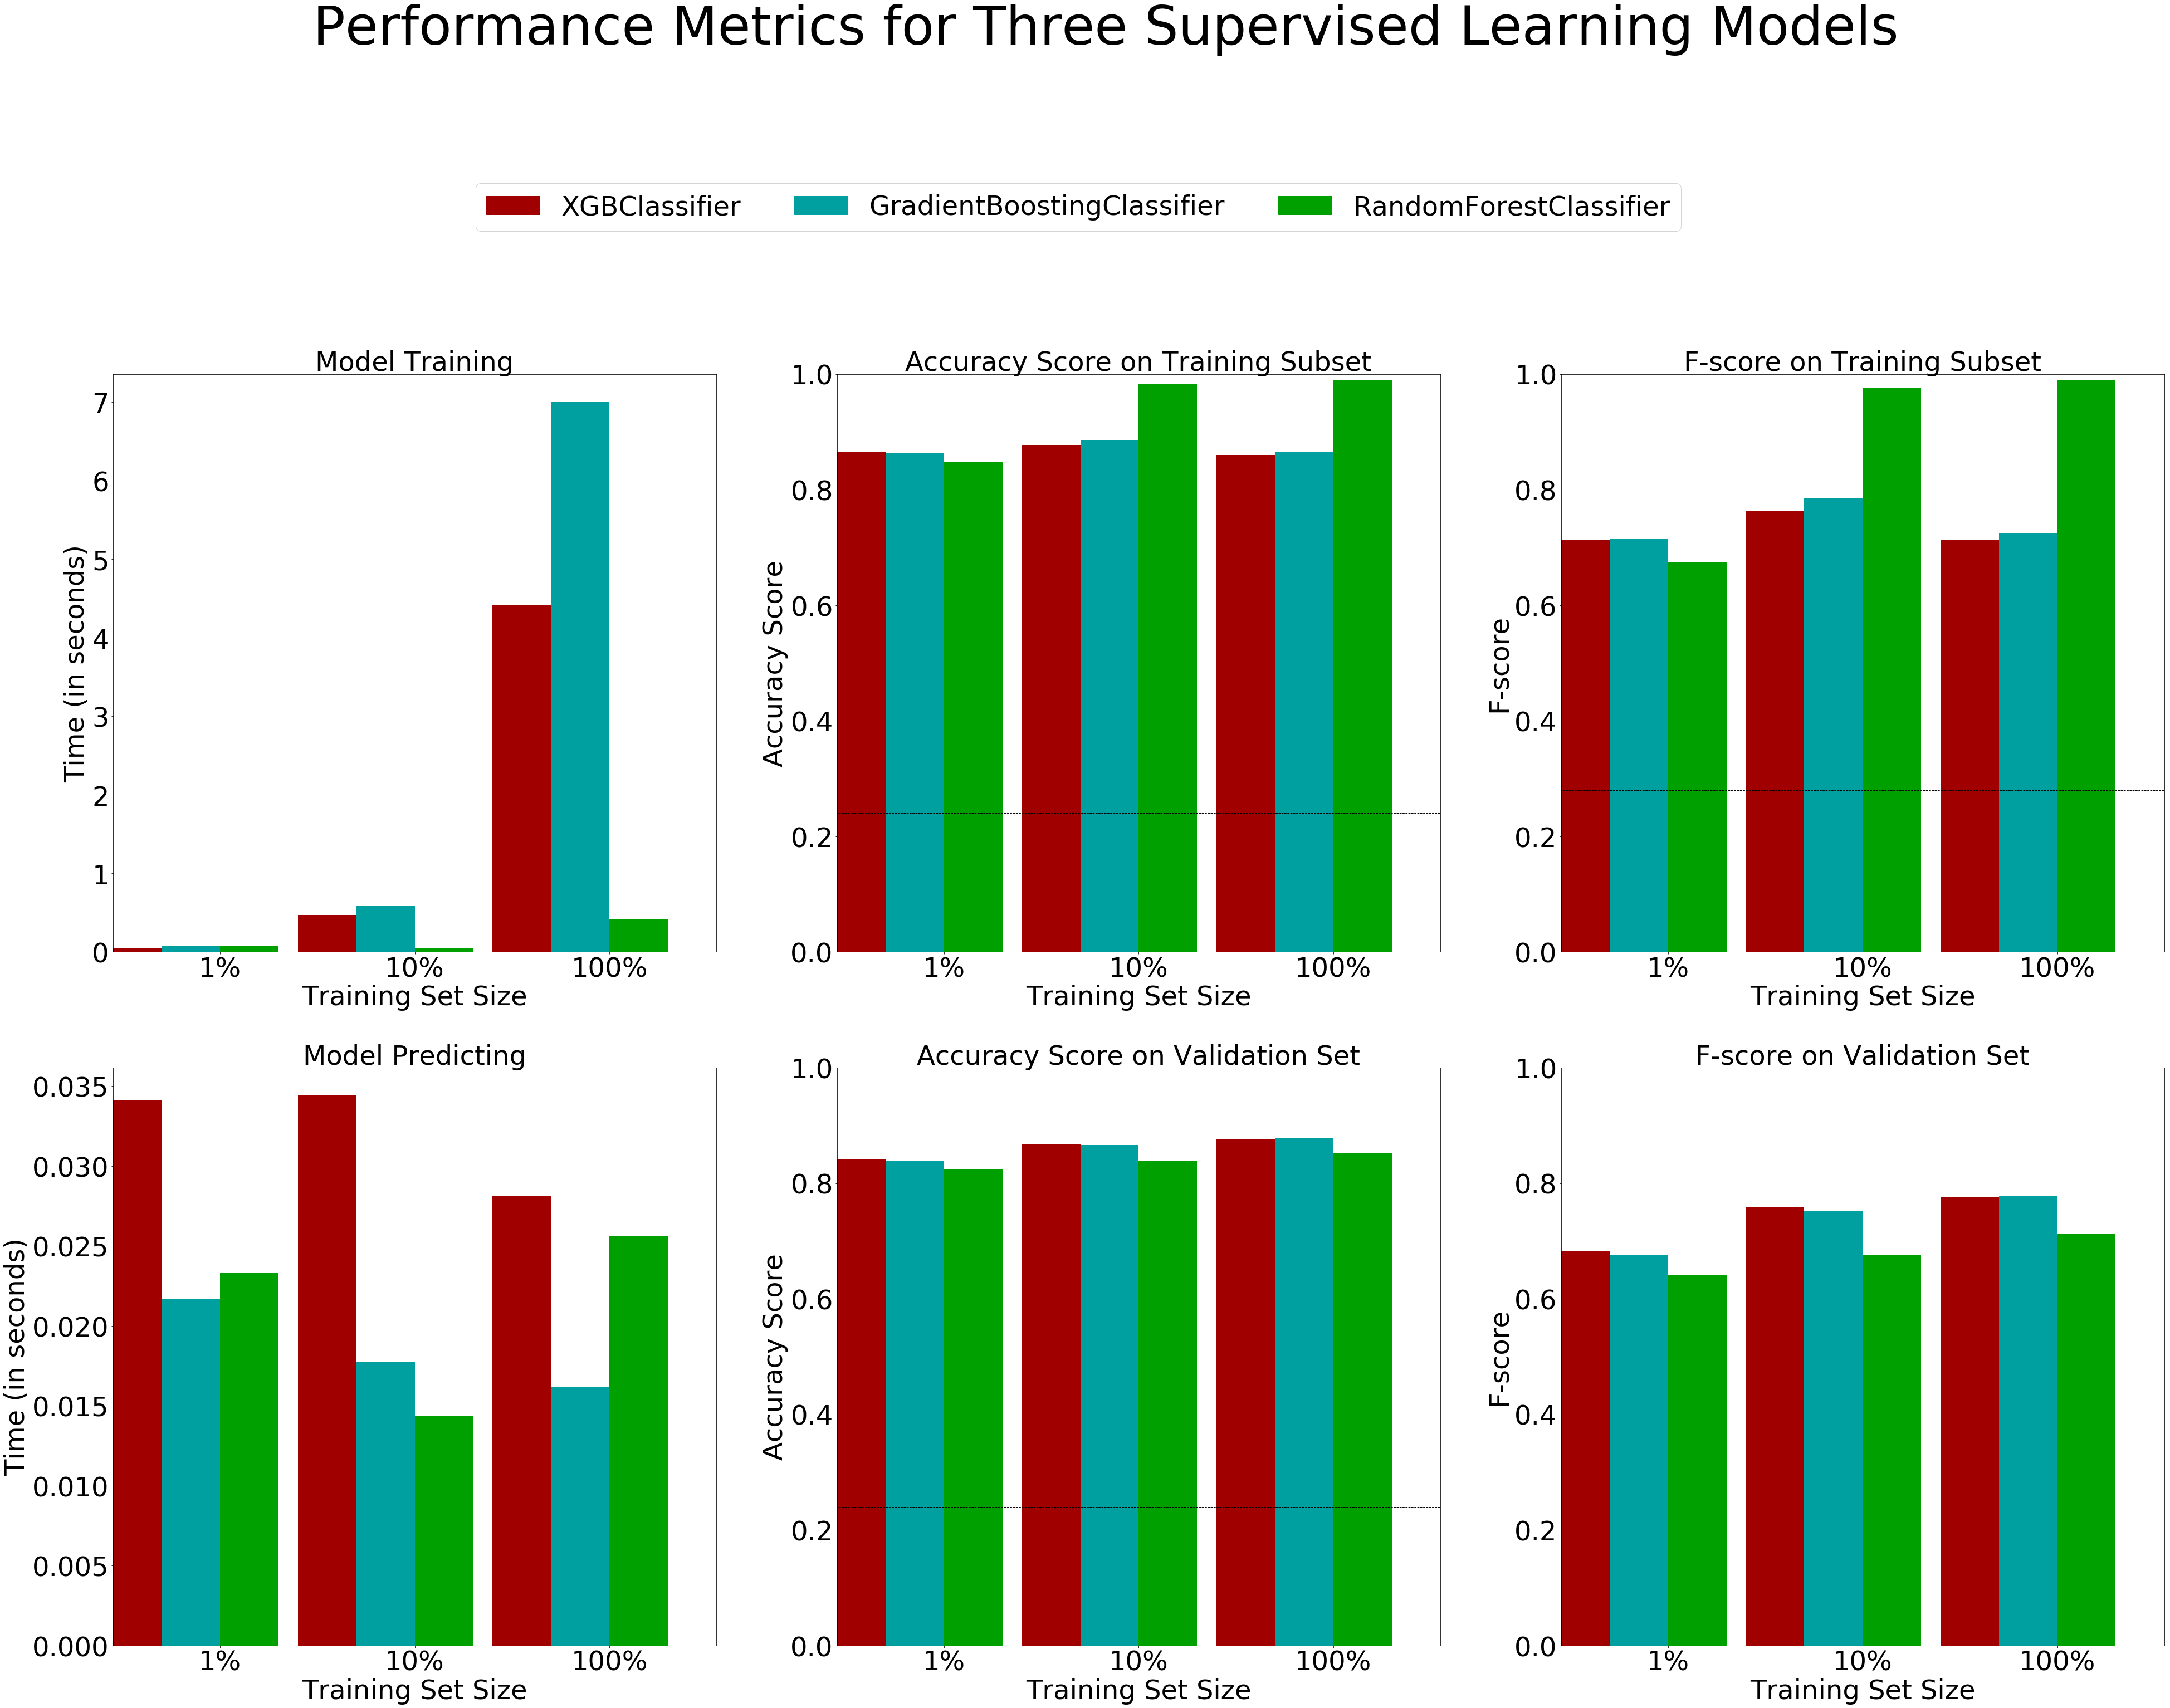

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Initialize the classifiers
randomForest = RandomForestClassifier(random_state=0)
adaBoost = AdaBoostClassifier(random_state=0)
gradientBoost = GradientBoostingClassifier(random_state=0)
xgb = XGBClassifier(random_state=0)

# n_estimators=100, learning_rate=1.0, max_depth=1, 
# 
samples_100 = len(y_train)
samples_10 = int(round(0.1 * samples_100))
samples_1 = int(round(0.01 * samples_100))

# Collect results on the learners
results = {}
for clf in [gradientBoost, randomForest, xgb]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_val, y_val)

# Run metrics visualization for the three ensemble learning models chosen
vs.evaluate(results, naive_accuracy, naive_fscore)


## Model Improvement
From the evaluation on the results of the three models, **XGBoost** and **GradientDescent Boosting** classifiers share a very high accuracy on the validation datasets which is around **0.87**. However, **RandomForest** classifier has an accuracy of **0.85** which is smaller compared with the other models.

Thus, I will choose boosting methods and try to improve **XGBoost** and **Gradient Boosting**.

**Note: Since the following procedures will take a long time to run, I have not runned them in the 'readme.pdf'. But the results are already listed in the next part.**

### Gradient Boosting

In [18]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import GradientBoostingClassifier


clf = GradientBoostingClassifier(random_state=0)
parameters = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth":[3],
    "n_estimators":[200, 400, 600, 800]
}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer, cv=10, n_jobs=-1, verbose=10)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train.values.flatten())

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_val)
best_predictions = best_clf.predict(X_val)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_val, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_val, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_val, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 0.5))
print best_clf

### XGBoost

In [ ]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from xgboost import XGBClassifier

clf = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=2,
 min_child_weight=2,
 gamma=0.3,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)


parameters = {
    'max_depth': [2, 3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    "n_estimators":[600, 800, 1000],
    'min_child_weight':range(2,5,1),
    "gamma": [i/10.0 for i in range(0,5)]
}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer, cv=10, n_jobs=-1, verbose=10)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train.values.flatten())

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_val)
best_predictions = best_clf.predict(X_val)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_val, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_val, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_val, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 0.5))
print best_clf

### Result

#### Gradient Descent
**Optimized Model:**  
Final accuracy score on the testing data: 0.8807  
Final F-score on the testing data: 0.7773  
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=400,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)
              
#### XGBoost
**Optimized Model:**  
Final accuracy score on the testing data: 0.8829  
Final F-score on the testing data: 0.7835  
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.3, learning_rate=0.1,
       max_delta_step=0, max_depth=2, min_child_weight=2, missing=None,
       n_estimators=1000, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.8)
       
#### Result
| Parameters/Models | Gradient Descent Boosting | XGBoost |
| :---------------: | :-----------------------: | :-----: |
| **Accuracy**      | 0.8807                    |  0.8829 |
| **F-0.5 Score**   | 0.7773                    |  0.7835 |

Thus, I finally choose **XGBoost** for prediction.

## Prediction on the Test Datasets

### Train the XGBoost Model

In [19]:
from xgboost import XGBClassifier

xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=0.8, gamma=0.3, learning_rate=0.1,
                    max_delta_step=0, max_depth=2, min_child_weight=2,
                    missing=None, n_estimators=1000, n_jobs=1, nthread=4,
                    objective='binary:logistic', random_state=0, reg_alpha=0,
                    reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
                    subsample=0.8)

xgb = xgb.fit(train_features_pre, train_labels.values.ravel())


### Predict the test datasets

In [20]:
# start prediction
import pandas as pd

test_pred = xgb.predict(test_features_pre)
labels_pred_df = pd.DataFrame(data=test_pred)
display(labels_pred_df)
print labels_pred_df.shape
print test_features_pre.shape

# write to "A2_dzhengah_20546139_prediction.csv"
labels_pred_df.to_csv("A2_dzhengah_20546139_prediction.csv", index=None, header=None)

,0
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,0


(14653, 1)
(14653, 108)
